In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_rows = 50



In [2]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer ## TEST
from sklearn.feature_extraction.text import TfidfVectorizer ## TEST
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords ## TEST
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords') ##
nltk.download('punkt') ##
nltk.download('wordnet') ##

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/candaur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/candaur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/candaur/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv('data/glassdoor_ratings_main.csv')
df.head()

,NAME,SIZE,LOCATION_HQ,INDUSTRY,RATING_OVERALL,RATING_DI,RATING_CV,RATING_WL,RATING_SM,RATING_CB,RATING_CO,NUM_REVIEWS,DESCRIPTION,MISSION,FULL_DESCRIPTION,TARGET
0,McKinsey & Company,10000+ Employees,"New York, NY",Consulting,4.5,4.4,4.4,3.0,4.1,4.4,4.5,5198,We work with leaders across sectors to tackle ...,Mission: Our mission is two-fold: to help our ...,We work with leaders across sectors to tackle ...,1
1,Cornell University,10000+ Employees,"Ithaca, NY",Colleges & Universities,4.5,4.3,4.4,4.0,4.1,4.1,4.2,1765,"Cornell is a private, Ivy League university re...",,"Cornell is a private, Ivy League university re...",1
2,UC Santa Barbara,5001 to 10000 Employees,"Santa Barbara, CA",Colleges & Universities,4.5,4.2,4.3,4.4,4.1,3.7,4.0,1049,"Dude, let's hit the beach! And then we'll hit ...",,"Dude, let's hit the beach! And then we'll hit ...",1
3,UC Irvine,10000+ Employees,"Irvine, CA",Colleges & Universities,4.4,4.5,4.3,4.0,4.0,3.8,4.0,1398,"Sun, the beach, Nobel Prize winners, and a Sou...",,"Sun, the beach, Nobel Prize winners, and a Sou...",1
4,Iowa State University,5001 to 10000 Employees,"Ames, IA",Colleges & Universities,4.4,4.2,4.2,4.2,4.0,3.8,3.9,1203,Attending Iowa State University of Science and...,,Attending Iowa State University of Science and...,1


## TESTING

### Preprocessing TEST

#### Tokenization

Tokenization is the process of splitting documents into units of observations. We usually represent the tokens as n-gram, where n represent the consecutive words occuring in a document. In the case of unigram (one word token), the sentence "David works here" can be tokenized into?

"David", "works", "here" "David works", "works here"

In [4]:
description = df.iloc[0, 12].lower()
description

'we work with leaders across sectors to tackle some of their toughest challenges, e.g.: how to best grow a start-up, improve early education, or quickly enter a new market. we serve organizations of all sizes, ranging from small-to-midsized companies with revenues less than $5bn a year to 90 of the top 100 companies on the forbes global 2000 list. we have more than 120 offices, 22 industry practices, and eight functional practices. while most of our work is in the private sector, we serve ~80 governments, and we’ve completed ~4,000 projects for social sector organizations in the last five years. \n\nthat means whatever your passion, you will find others working on similar topics at mckinsey. if you know what you want to do, you can do it here. if you don’t know what you want to do, come to mckinsey to explore. visit our careers website to learn more and apply. subscribe to our careers blog for weekly job alerts and stories about our colleagues.'

In [5]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

tokenized_description = tokenizer.tokenize(description)

In [6]:
fdist = FreqDist(tokenized_description)
print(fdist)

<FreqDist with 120 samples and 172 outcomes>


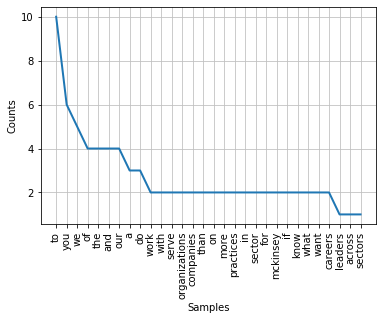

In [7]:
#should I remove capital letters?
plt.figure()
fdist.plot(30)

#### Stop Words

In [8]:
## automatic stop words, but you can add your own words as well
stop_words=set(stopwords.words("english")) 

In [9]:
filtered_description=[]
for w in tokenized_description:
    if w not in stop_words:
        filtered_description.append(w)
print("Filterd Sentence:",filtered_description)

Filterd Sentence: ['work', 'leaders', 'across', 'sectors', 'tackle', 'toughest', 'challenges', 'e', 'g', 'best', 'grow', 'start', 'improve', 'early', 'education', 'quickly', 'enter', 'new', 'market', 'serve', 'organizations', 'sizes', 'ranging', 'small', 'midsized', 'companies', 'revenues', 'less', '5bn', 'year', '90', 'top', '100', 'companies', 'forbes', 'global', '2000', 'list', '120', 'offices', '22', 'industry', 'practices', 'eight', 'functional', 'practices', 'work', 'private', 'sector', 'serve', '80', 'governments', 'completed', '4', '000', 'projects', 'social', 'sector', 'organizations', 'last', 'five', 'years', 'means', 'whatever', 'passion', 'find', 'others', 'working', 'similar', 'topics', 'mckinsey', 'know', 'want', 'know', 'want', 'come', 'mckinsey', 'explore', 'visit', 'careers', 'website', 'learn', 'apply', 'subscribe', 'careers', 'blog', 'weekly', 'job', 'alerts', 'stories', 'colleagues']


In [10]:
## After filtering words, words are now in half
print(len(tokenized_description))
print(len(filtered_description))

172
91


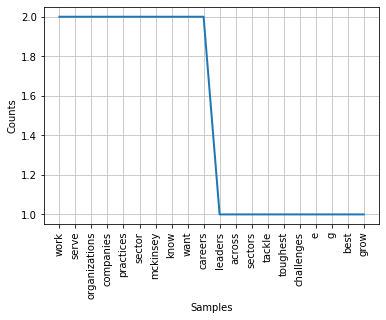

In [11]:
fdist = FreqDist(filtered_description)
plt.figure()
fdist.plot(20)

#### Stemming

In [12]:
from nltk.stem import PorterStemmer

In [13]:
ps = PorterStemmer()

stemmed_description=[]
for w in filtered_description:
    stemmed_description.append(ps.stem(w))

print(stemmed_description)

['work', 'leader', 'across', 'sector', 'tackl', 'toughest', 'challeng', 'e', 'g', 'best', 'grow', 'start', 'improv', 'earli', 'educ', 'quickli', 'enter', 'new', 'market', 'serv', 'organ', 'size', 'rang', 'small', 'midsiz', 'compani', 'revenu', 'less', '5bn', 'year', '90', 'top', '100', 'compani', 'forb', 'global', '2000', 'list', '120', 'offic', '22', 'industri', 'practic', 'eight', 'function', 'practic', 'work', 'privat', 'sector', 'serv', '80', 'govern', 'complet', '4', '000', 'project', 'social', 'sector', 'organ', 'last', 'five', 'year', 'mean', 'whatev', 'passion', 'find', 'other', 'work', 'similar', 'topic', 'mckinsey', 'know', 'want', 'know', 'want', 'come', 'mckinsey', 'explor', 'visit', 'career', 'websit', 'learn', 'appli', 'subscrib', 'career', 'blog', 'weekli', 'job', 'alert', 'stori', 'colleagu']


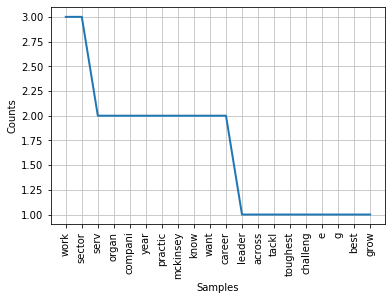

In [14]:
fdist = FreqDist(stemmed_description)
fdist.plot(20)

### Feature Engineering TEST
 - BoW or TF-IDF?

## WORKING

**Preprocessing**

In [15]:
#define features and target
data = df['FULL_DESCRIPTION']
target = df['TARGET']

In [16]:
#getting punctuation
import string, re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
## setting stopwords and punctuations
sw_list = stopwords.words('english')
sw_list += list(string.punctuation) #appending to stopwords
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘',
            'said', 'one', 'com', '-', '–', '—', 'company', "'s", 
            'services', 'world', 'people', 'care', 'health', 'us'
           ]
sw_set = set(sw_list)

In [49]:
# we can define a function that removes stopwords 
def process_description(description):
    tokens = nltk.word_tokenize(description)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed 

In [50]:
# applying the above function to our data/features with map() method
processed_data = list(map(process_description, data))

In [51]:
#take a look at the number of verbs
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

15030

### Baseline model
- Random Forest with Lemmatization
- **try also with BoW instead of TF-IDF??**
- **try also with Stemming instead of Lemmatization??** 

In [52]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

# creating a list with all lemmatized outputs
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [53]:
#defining X_lem for modeling process
X_lem = lemmatized_output
# [' '.join(d) for d in processed_data]

y_lem = target
X_lem[1]

'cornell private ivy league university recognized leading-edge employer exemplary research university main campus located ithaca new york reach span globe cornell campus new york city doha qatar well dozen research station new york state beyond staff faculty student thrive cornell unparalleled combination quality breadth open collaborative innovative culture founding commitment diversity inclusion vibrant rural urban campus land-grant legacy public engagement'

#### 2. Corpus Statistics and EDA

In [54]:
# always train-test split THEN tokenize / apply vectorizer 
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)
tfidf = TfidfVectorizer() ## TEST remove stopwords, turn into uppercase, bigram/trigram

#fit vectorizer to both training and testing set
tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

#
tfidf_data_train_lem

<1123x10492 sparse matrix of type '<class 'numpy.float64'>'
	with 72425 stored elements in Compressed Sparse Row format>

In [55]:
# 99% of columns are 0 -- very sparce df
non_zero_cols = tfidf_data_train_lem.nnz / float(tfidf_data_train_lem.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train_lem.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 64.49243098842386
Percentage of columns containing ZERO: 0.993853180424283


#### Most Frequent Words - EDA

In [56]:
df_freq_inclusive = df[df['TARGET']==1]
df_freq_not_inclusive = df[df['TARGET']==0]

In [57]:
data_incl = df_freq_inclusive['FULL_DESCRIPTION']
data_not_incl = df_freq_not_inclusive['FULL_DESCRIPTION']

In [58]:
pros_incl = list(map(process_description, data_incl))
pros_not_incl = list(map(process_description, data_not_incl))

In [59]:
total_vocab_incl = set()
for comment in pros_incl:
    total_vocab_incl.update(comment)
len(total_vocab_incl)

9990

In [60]:
total_vocab_NOT_incl = set()
for comment in pros_not_incl:
    total_vocab_NOT_incl.update(comment)
len(total_vocab_NOT_incl)

10224

In [62]:
flat_incl = [item for sublist in pros_incl for item in sublist]
flat_not_incl = [item for sublist in pros_not_incl for item in sublist]

In [63]:
inclusive_freq = FreqDist(flat_incl)
not_inclusive_freq = FreqDist(flat_not_incl)

In [64]:
# Top 20 inclusive words:
inclusive_freq.most_common(20)

[('work', 288),
 ('university', 276),
 ('business', 262),
 ('customers', 221),
 ('new', 204),
 ('solutions', 203),
 ('best', 191),
 ('every', 190),
 ('global', 185),
 ('technology', 181),
 ('products', 178),
 ('service', 176),
 ('employees', 172),
 ('make', 170),
 ('also', 167),
 ('including', 164),
 ('across', 160),
 ('help', 158),
 ('largest', 155),
 ('mission', 154)]

In [65]:
# Top 20 non-inclusive words:
not_inclusive_freq.most_common(20)

[('business', 222),
 ('work', 222),
 ('customers', 221),
 ('solutions', 217),
 ('university', 203),
 ('products', 201),
 ('new', 186),
 ('also', 186),
 ('global', 186),
 ('technology', 184),
 ('employees', 173),
 ('every', 161),
 ('across', 160),
 ('leading', 158),
 ('including', 157),
 ('largest', 154),
 ('service', 150),
 ('clients', 149),
 ('communities', 143),
 ('mission', 139)]

#### Normalized word frequencies:

In [66]:
#Inclusive
inclusive_total_word_count = sum(inclusive_freq.values())
inclusive_top_25 = inclusive_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in inclusive_top_25:
    normalized_frequency = word[1]/inclusive_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

work 		 0.005124
university 		 0.004911
business 		 0.004661
customers 		 0.003932
new 		 0.00363
solutions 		 0.003612
best 		 0.003398
every 		 0.00338
global 		 0.003291
technology 		 0.00322
products 		 0.003167
service 		 0.003131
employees 		 0.00306
make 		 0.003025
also 		 0.002971
including 		 0.002918
across 		 0.002847
help 		 0.002811
largest 		 0.002758
mission 		 0.00274
financial 		 0.002687
home 		 0.002633
companies 		 0.002615
leading 		 0.002598
team 		 0.002598


In [67]:
#Not inclusive
not_inclusive_total_word_count = sum(not_inclusive_freq.values())
not_inclusive_top_25 = not_inclusive_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in not_inclusive_top_25:
    normalized_frequency = word[1]/not_inclusive_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

business 		 0.004219
work 		 0.004219
customers 		 0.0042
solutions 		 0.004124
university 		 0.003858
products 		 0.00382
new 		 0.003535
also 		 0.003535
global 		 0.003535
technology 		 0.003497
employees 		 0.003288
every 		 0.00306
across 		 0.003041
leading 		 0.003003
including 		 0.002984
largest 		 0.002927
service 		 0.002851
clients 		 0.002832
communities 		 0.002718
mission 		 0.002642
team 		 0.002547
best 		 0.00249
states 		 0.002414
help 		 0.002395
management 		 0.002395


#### Visualization
- Bar Chart

In [68]:
# create counts of satire and not satire with values and words
inclusive_bar_counts = [x[1] for x in inclusive_freq.most_common(25)]
inclusive_bar_words = [x[0] for x in inclusive_freq.most_common(25)]

not_inclusive_bar_counts = [x[1] for x in not_inclusive_freq.most_common(25)]
not_inclusive_bar_words = [x[0] for x in not_inclusive_freq.most_common(25)]

In [69]:
# set the color of our bar graphs
color = cm.viridis_r(np.linspace(.4,.8, 30))

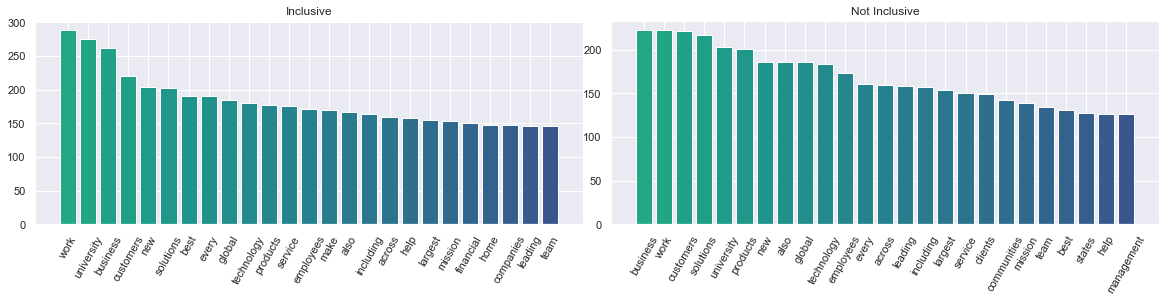

In [70]:
new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

# Generate a line plot on first axes
ax.bar(inclusive_bar_words, inclusive_bar_counts, color=color)
# ax.plot(colormap='PRGn')

# Draw a scatter plot on 2nd axes
ax2.bar(not_inclusive_bar_words, not_inclusive_bar_counts, color=color )

ax.title.set_text('Inclusive')
ax2.title.set_text('Not Inclusive')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

# plt.savefig('word count bar graphs.png')

plt.show()

#### Visualization 
- Word Clouds

In [40]:
# Getting our data into a dictionary
# FORMAT:  dictionary = dict(zip(keys, values))
#!pip install wordcloud
from wordcloud import WordCloud
inclusive_dictionary = dict(zip(inclusive_bar_words, inclusive_bar_counts))
not_inclusive_dictionary = dict(zip(not_inclusive_bar_words, not_inclusive_bar_counts))

In [41]:
not_inclusive_dictionary

{'services': 344,
 'world': 329,
 'health': 252,
 'people': 246,
 'care': 241,
 'us': 240,
 'business': 222,
 'work': 222,
 'customers': 221,
 'solutions': 217,
 'university': 203,
 'products': 201,
 'new': 186,
 'also': 186,
 'global': 186,
 'technology': 184,
 'employees': 173,
 'every': 161,
 'across': 160,
 'leading': 158,
 'including': 157,
 'largest': 154,
 'service': 150,
 'clients': 149,
 'communities': 143}

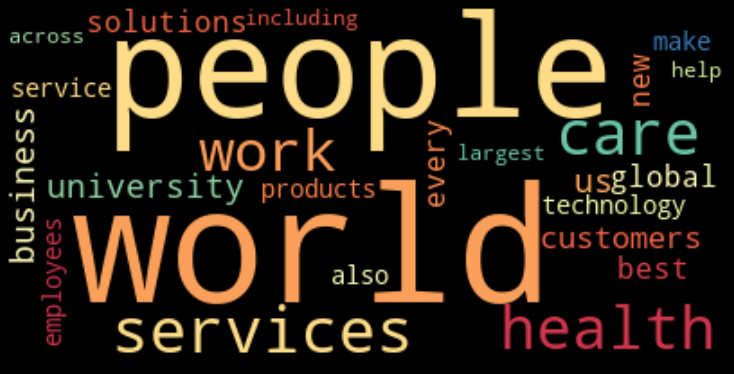

In [42]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(inclusive_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

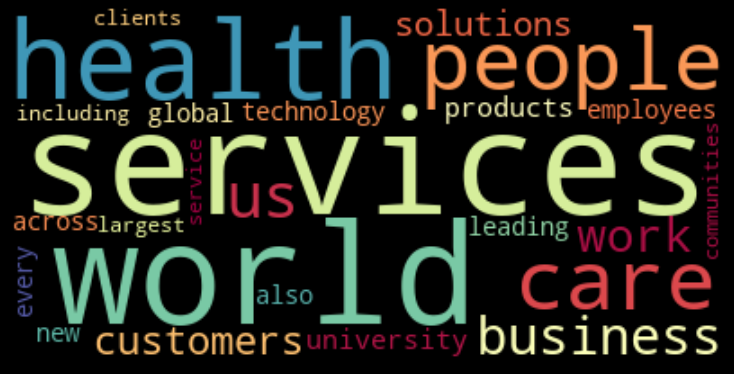

In [43]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(not_inclusive_dictionary)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('not_satire_wordcloud.png')

plt.show()

#### Classify (RF/Lem)
- Testing Accuracy: 0.5196
- F1 Score: 0.5455

In [71]:
# TEST
rf_classifier_lem = RandomForestClassifier(n_estimators=100, random_state=0)


In [72]:
## Fit model to train set
rf_classifier_lem.fit(tfidf_data_train_lem, y_train_lem)

rf_test_preds_lem = rf_classifier_lem.predict(tfidf_data_test_lem)

In [73]:
rf_acc_score_lem = accuracy_score(y_test_lem, rf_test_preds_lem)
rf_f1_score_lem = f1_score(y_test_lem, rf_test_preds_lem)
print('Random Forest with Lemmatization Features')
print("Testing Accuracy: {:.4}".format(rf_acc_score_lem))
print()
print("F1 Score: {:.4}".format(rf_f1_score_lem))

Random Forest with Lemmatization Features
Testing Accuracy: 0.5516

F1 Score: 0.5743


(2.0, 0.0)

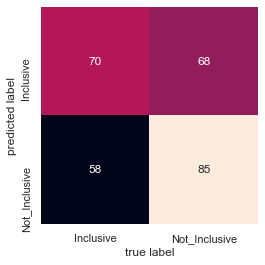

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


mat = confusion_matrix(y_test_lem, rf_test_preds_lem)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Inclusive', 'Not_Inclusive'], yticklabels=['Inclusive', 'Not_Inclusive'])
plt.xlabel('true label')
plt.ylabel('predicted label');

## Fixing cut-off bug
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

### Next model
- RF with Stemming